## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [27]:
# Linear-Regression
# 随机产生两系列数据
import numpy as np
import random
random_data = np.random.random((20, 2))
X = random_data[:,0]
def assuming_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 15.8 * x + 5+np.random.randint(-5,5)

X

array([0.70453469, 0.6202538 , 0.42056889, 0.0337523 , 0.64946408,
       0.25240364, 0.27005322, 0.78991391, 0.26520719, 0.30350205,
       0.53537962, 0.89809374, 0.04971363, 0.98646059, 0.66913209,
       0.07293736, 0.79674638, 0.3877931 , 0.77702124, 0.74592701])

In [28]:
y = [assuming_function(x) for x in X]

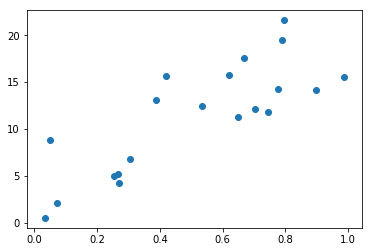

In [29]:
# plot data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [31]:
# fit and predict
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X.reshape(-1, 1), y)
reg.score(X.reshape(-1, 1), y)

0.6589227908087694

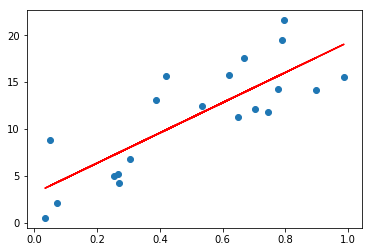

In [32]:
# predict model
def fit(x): 
    return reg.coef_ * x + reg.intercept_
# plot fit line
plt.scatter(X,y)
plt.plot(X, fit(X), color='red')

In [40]:
# reg.predict([[0.9]])==fit(0.9)
reg.predict([[0.9]])

array([17.63725923])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [41]:
# KNN
from scipy.spatial.distance import cosine
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]
def distance(x1, x2):
    return cosine(x1, x2)
def predict(mymodel,x, k=3):
    # 在predicate的时候，需要做大量的计算
    most_similars = sorted(mymodel, key=lambda xi: distance(xi[0], x))[:k]
    y_hats = [_y for x, _y in most_similars]
    print(most_similars)
    return np.mean(y_hats)

In [42]:
my_knn = model(X, y)
predict(my_knn,0.9)

[(0.789913907257494, 19.480639734668408), (0.30350204596985153, 6.7953323263236545), (0.6691320945020902, 17.572287093133028)]


14.616086384708362

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [45]:
# Decision Tree
# entropy
from collections import Counter 
from icecream import ic
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)


In [52]:
# find the optimal feature as the spilter of Decision Tree
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_split_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_split_1)
            ic(entropy_1)
            
            sub_split_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            
            entropy_2 = entropy(sub_split_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [53]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)

In [54]:
find_the_optimal_spilter(training_data=dataset, target='bought')


ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| pro

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [55]:
find_the_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_split_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| sub_split_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_

spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

In [56]:
fm_n_1 = dataset[dataset['family_number'] == 1]
fm_n_1[fm_n_1['income'] == '+10']
find_the_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_split_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_split_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| f: 'income'
ic| values: {'+10'}
ic| sub_split_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

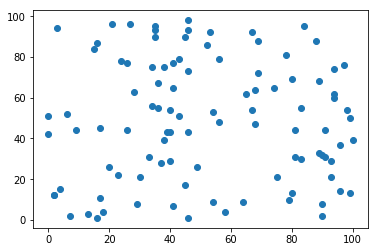

In [57]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)

In [58]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=6, max_iter=500)
cluster.fit(tranning_data)
cluster.cluster_centers_

array([[81.25      , 68.8       ],
       [13.72727273, 10.54545455],
       [35.39130435, 84.30434783],
       [88.72222222, 25.11111111],
       [30.27777778, 47.61111111],
       [46.4       , 15.1       ]])

In [59]:
cluster.labels_

array([4, 4, 0, 2, 4, 4, 2, 2, 4, 2, 2, 4, 3, 2, 0, 2, 0, 1, 4, 0, 4, 4,
       2, 2, 2, 2, 3, 4, 5, 5, 5, 0, 3, 4, 3, 3, 1, 0, 3, 0, 5, 3, 3, 5,
       3, 5, 4, 5, 4, 0, 0, 3, 3, 1, 0, 2, 3, 0, 3, 2, 2, 0, 2, 3, 2, 0,
       1, 1, 4, 0, 5, 3, 2, 2, 1, 0, 2, 4, 3, 1, 3, 0, 0, 1, 2, 5, 3, 4,
       2, 0, 1, 0, 2, 1, 4, 0, 5, 1, 4, 2])

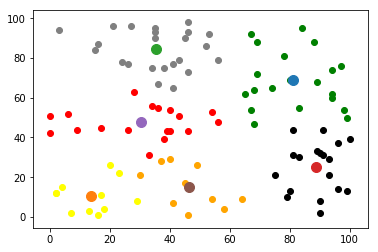

In [60]:
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
    
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 模型是通过训练大量数据，从数据中获得“经验”，拟合实际的规律，用来预测新数据。没有模型是能完全描述实际的，但我们并不需要完美的模型，只要模型对实践有推动指导作用，就是有用的模型。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:Underfitting means bias is too much, while overfitting means variance is too much. 
Reasons for overfitting:Taking noises as features, memorize too much details of training data,while generalization is not enough.
Reasons for underfitting: The ability of the learning model is weak, while the data is too complex.

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:
- Precision：P=TP/(TP+FP) 精准率（查准率） 它表示的是预测为正的样本中有多少是真正的正样本;
- Recall: R = R=TP/(TP+FN) 召回率（查全率 ） 它表示的是所有正样本中被预测准确的比率；
- AUC: Area under curve(ROC).用TPR和FPR形成的曲线平滑度和该曲线下的面积大小，衡量模型的好坏
- F1-score：2/(1/P+1/R)，其中的P指查准率，R指查全率，F1是两个率重要性相当的评估指标。 
- F2-score: 来自Fbeta，beta=2, 此评估指标更适用于重视查全率的应用场景，比如癌症患者预测。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 机器学习就是通过学习历史数据，找出历史数据中的特征规律，获得“经验”，从而具备预测推断的智能，形成可预测新数据的模型。传统的分析式编程，所有的规律都需要提前内置在程序或算法中。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

In [ ]:
Ans：这句话非常正确！评价模型好坏的指标众多，但不同的指标适用不同的场景，有的侧重查全率，有的适用精准度，如果能正确定义合适的评价标准，
在模型测试过程中就能及时调整优化各类参数，否则，错误的评价标准可能会使得所有的调参南辕北辙。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [95]:
# Perdicate based on Desicion Tree
# loop findoptimalspliter(f,v)
# filter dataset by (f,v),check labels left
# if labels unique, that is the result
# if loop end & labels not unique, choose the mode as the result
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
def predict(gender,income,family_number):
    testdict={'gender':gender,'income':income,'family_number':family_number}
    training_data=dataset
    for i in range(len(testdict)):
        (f,v) = find_the_optimal_spilter(training_data, target='bought')

        if testdict[f]==v:
            training_data = training_data[dataset[f]==v]
        else:
            training_data= training_data[dataset[f]!=v]
        labels = set(training_data['bought'])
        if len(labels)==1:
            return list(labels)[0]
    return Counter(training_data['bought']).most_common()[0][0]
    


In [96]:
predict('F','10+',1)
#dataset

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| pro

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


 [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_split_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| sub_split_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565


spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1

In [104]:
Counter([1,0,3,1,0,1]).most_common()[0][0]

1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [68]:
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

In [66]:
# Linear Regression
def price(rm, k, b):
    return k * rm + b
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [64]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i in list(x):
        gradient += abs(x_i)
    return 1/n * gradient

def partial_derivative_b():
    return 0

In [70]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = 0#partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 469.48941202046007, parameters k is 62.73548128484424 and b is 97.75265535477467
Iteration 1, the loss is 469.44991539107735, parameters k is 62.72919665045689 and b is 97.75265535477467
Iteration 2, the loss is 469.410418761695, parameters k is 62.72291201606954 and b is 97.75265535477467
Iteration 3, the loss is 469.3709221323117, parameters k is 62.716627381682194 and b is 97.75265535477467
Iteration 4, the loss is 469.3314255029297, parameters k is 62.710342747294845 and b is 97.75265535477467
Iteration 5, the loss is 469.29192887354657, parameters k is 62.7040581129075 and b is 97.75265535477467
Iteration 6, the loss is 469.25243224416414, parameters k is 62.69777347852015 and b is 97.75265535477467
Iteration 7, the loss is 469.21293561478143, parameters k is 62.6914888441328 and b is 97.75265535477467
Iteration 8, the loss is 469.17343898539866, parameters k is 62.68520420974545 and b is 97.75265535477467
Iteration 9, the loss is 469.13394235601646, param

Iteration 167, the loss is 462.8934749135549, parameters k is 61.685947342156986 and b is 97.75265535477467
Iteration 168, the loss is 462.85397828417257, parameters k is 61.67966270776964 and b is 97.75265535477467
Iteration 169, the loss is 462.8144816547891, parameters k is 61.67337807338229 and b is 97.75265535477467
Iteration 170, the loss is 462.7749850254069, parameters k is 61.66709343899494 and b is 97.75265535477467
Iteration 171, the loss is 462.73548839602427, parameters k is 61.66080880460759 and b is 97.75265535477467
Iteration 172, the loss is 462.6959917666413, parameters k is 61.65452417022024 and b is 97.75265535477467
Iteration 173, the loss is 462.6564951372585, parameters k is 61.64823953583289 and b is 97.75265535477467
Iteration 174, the loss is 462.6169985078758, parameters k is 61.641954901445544 and b is 97.75265535477467
Iteration 175, the loss is 462.57750187849314, parameters k is 61.635670267058195 and b is 97.75265535477467
Iteration 176, the loss is 462.

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)